In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import scipy.stats as stats
import numpy as np
from pandas.api.types import is_numeric_dtype
import statsmodels.api as sm 
import seaborn as sns
from seaborn_qqplot import QQPlot
from matplotlib import pyplot as plt
from scipy.stats import gamma
from sklearn.preprocessing import StandardScaler
import pickle 
from sklearn.metrics import mean_squared_error
#-------Importing tensorflow libraries-------#
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
#------split and pipeline libraries------#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
#--------------------------------------------------#
from statsmodels.stats.outliers_influence import variance_inflation_factor 
sns.set(color_codes=True)
%matplotlib inline

In [2]:
df  = pd.read_csv("Part- 1,2&3 - Signal.csv")

In [3]:
df.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [4]:
df.isnull().any()

Parameter 1        False
Parameter 2        False
Parameter 3        False
Parameter 4        False
Parameter 5        False
Parameter 6        False
Parameter 7        False
Parameter 8        False
Parameter 9        False
Parameter 10       False
Parameter 11       False
Signal_Strength    False
dtype: bool

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
Parameter 1        1599 non-null float64
Parameter 2        1599 non-null float64
Parameter 3        1599 non-null float64
Parameter 4        1599 non-null float64
Parameter 5        1599 non-null float64
Parameter 6        1599 non-null float64
Parameter 7        1599 non-null float64
Parameter 8        1599 non-null float64
Parameter 9        1599 non-null float64
Parameter 10       1599 non-null float64
Parameter 11       1599 non-null float64
Signal_Strength    1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Converting signal strength in categorical variable

In [6]:
df['Signal_Strength'] = df['Signal_Strength'].astype('object')

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
Parameter 1        1599 non-null float64
Parameter 2        1599 non-null float64
Parameter 3        1599 non-null float64
Parameter 4        1599 non-null float64
Parameter 5        1599 non-null float64
Parameter 6        1599 non-null float64
Parameter 7        1599 non-null float64
Parameter 8        1599 non-null float64
Parameter 9        1599 non-null float64
Parameter 10       1599 non-null float64
Parameter 11       1599 non-null float64
Signal_Strength    1599 non-null object
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


## Univariate Analysis

In [8]:
df.describe()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000   
mean      8.319637     0.527821     0.270976     2.538806     0.087467   
std       1.741096     0.179060     0.194801     1.409928     0.047065   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.420000     2.600000     0.090000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1599.000000  1599.000000  1599.000000  1599.000000   1599.000000   
mean     15.874922    46.467792     0.996747     3.311113      0.658149   
std      10.460157    32.895324     0.001887     0.154386      0.169507   
min       1.000000     6.000000     0.990070     2.740000      0.330000   
25%       7.000000    22.000000     0.995600     3.210000      0.550000   
50%      14.000000    38.000000     0.996750     3.310000      0.620000   
75%      21.000000    62.000000     0.997835     3.400000      0.730000   
max      72.000000   289.000000     1.003690     4.010000      2.000000   

       Parameter 11  
count   1599.000000  
mean      10.422983  
std        1.065668  
min        8.400000  
25%        9.500000  
50%       10.200000  
75%       11.100000  
max       14.900000

### Distribution plots for each continous parameters

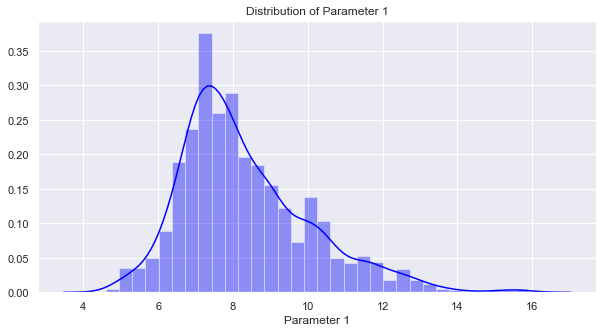

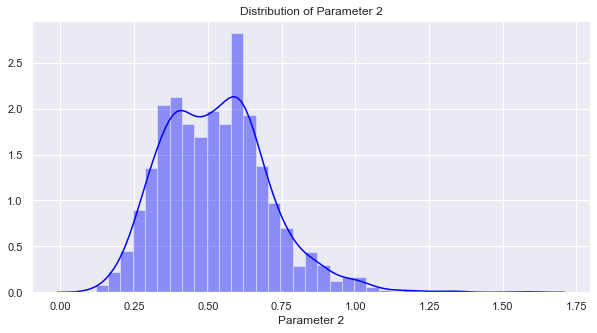

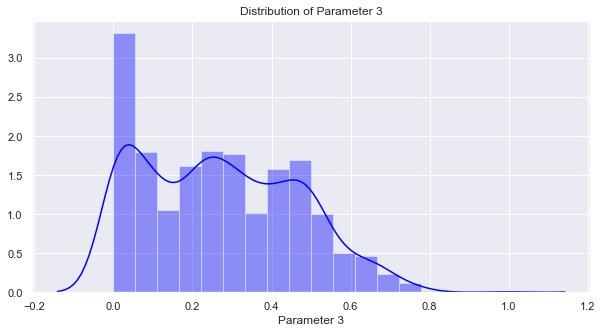

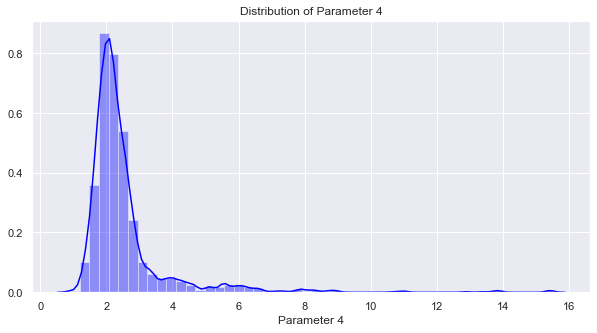

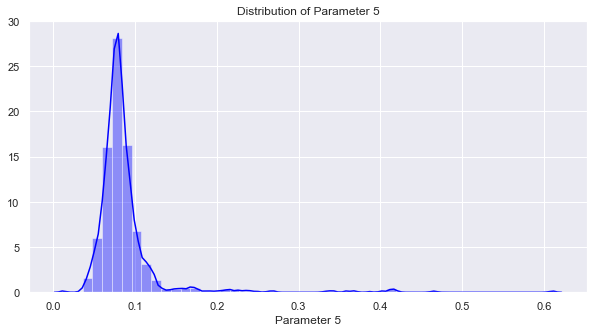

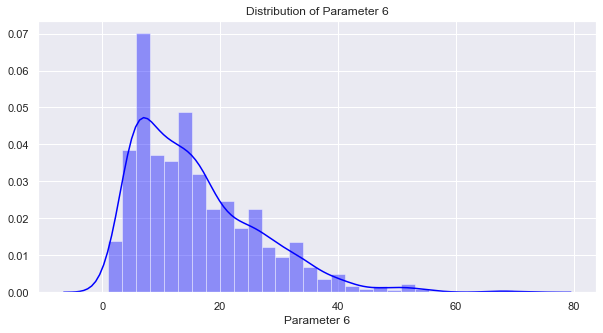

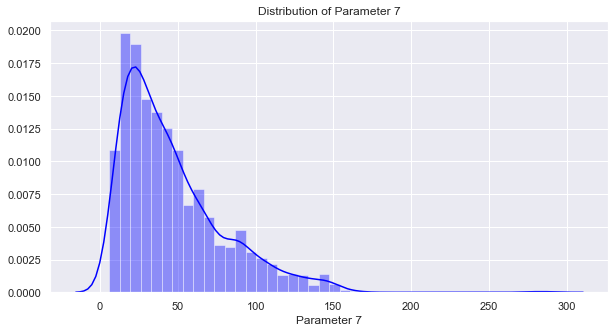

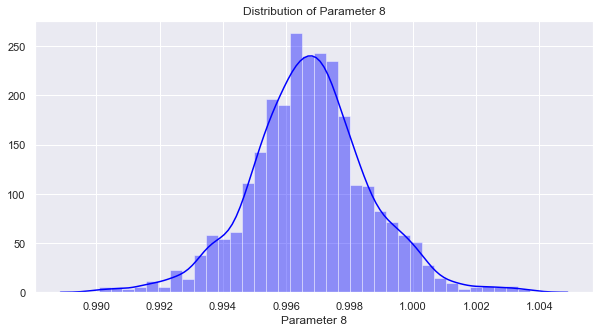

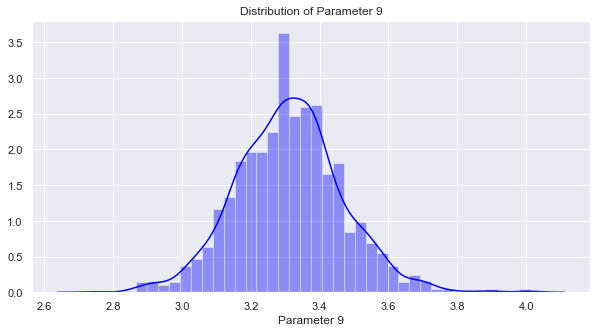

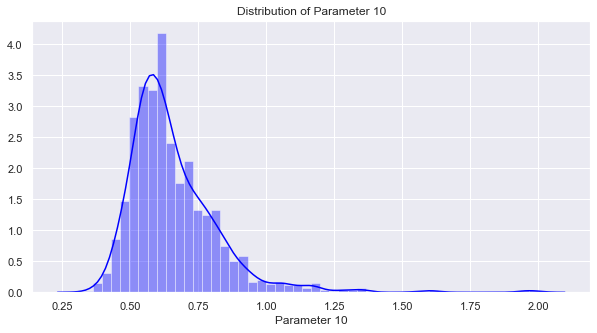

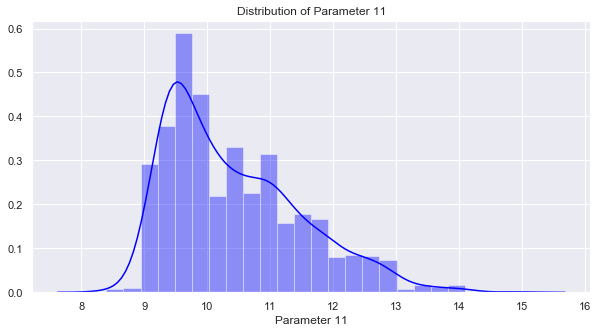

In [9]:
columns = list(df.drop(columns=['Signal_Strength']).columns)
for column in columns:
    plt.figure(figsize=(10, 5))
    sns.distplot(df[column], color = "blue").set_title("Distribution of "+column)

### Box plot of each parameter with respect to the signal strength

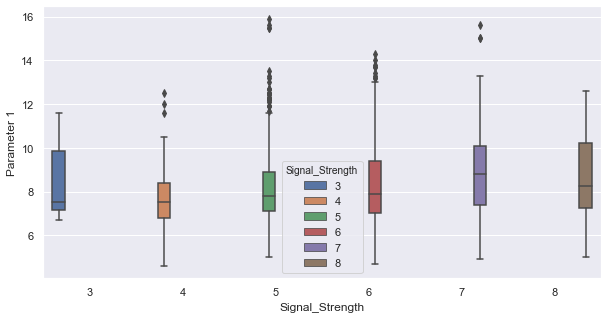

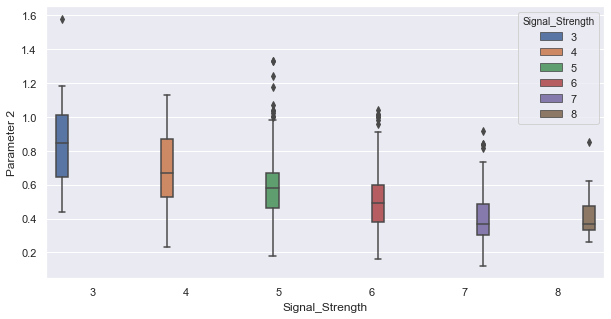

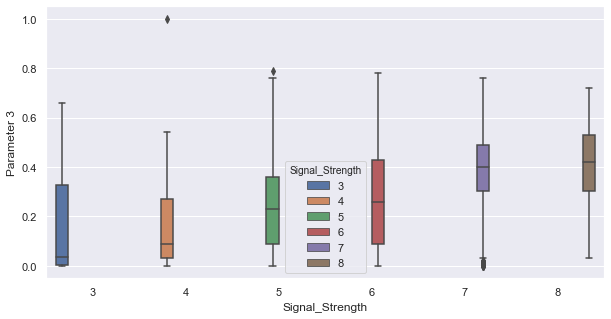

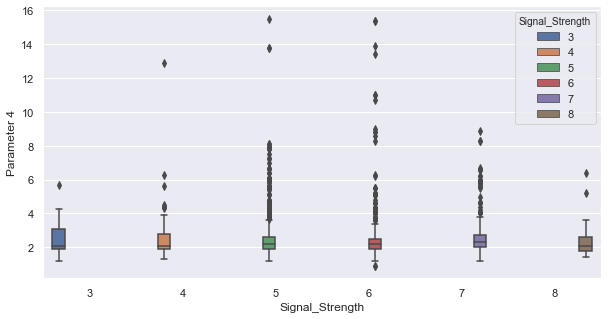

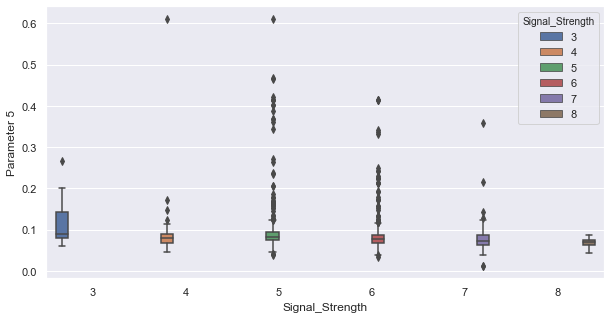

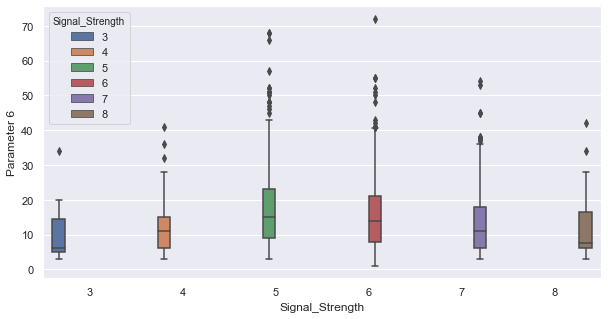

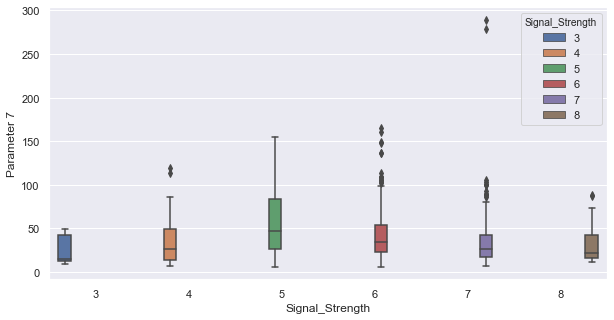

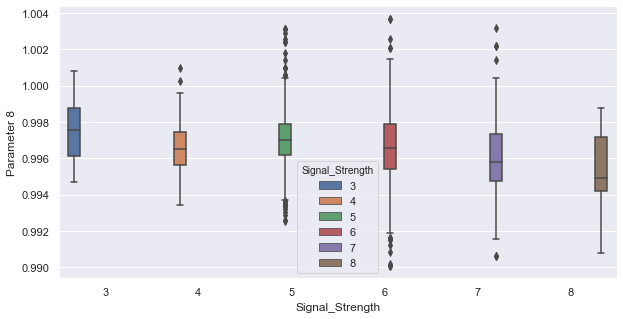

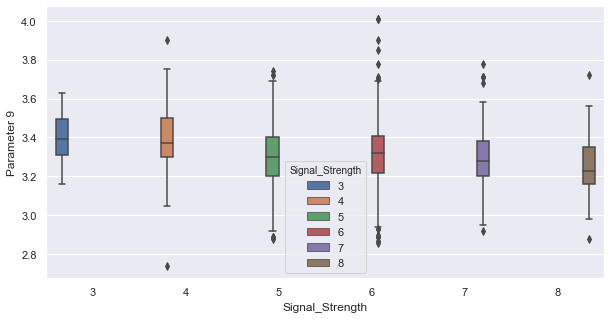

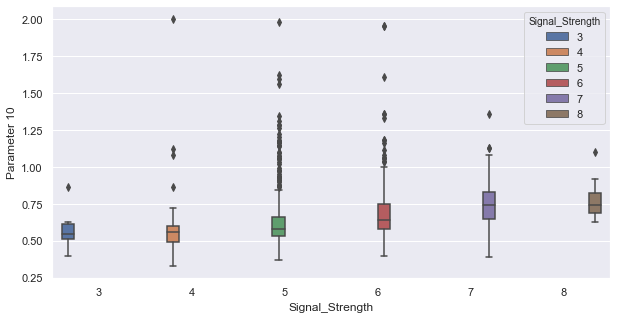

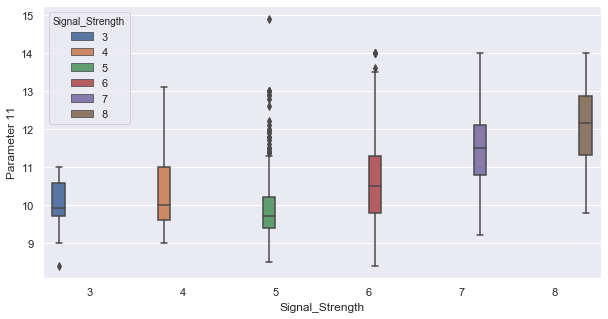

In [10]:
for column in columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Signal_Strength',y=column, data = df, hue = 'Signal_Strength')
    

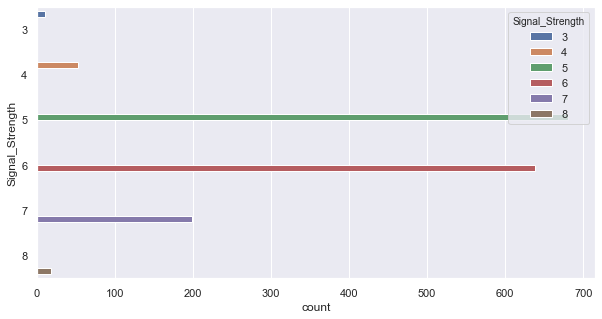

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Signal_Strength',hue = 'Signal_Strength', data = df)

### Calculating median , mode ,skewness and kurtosis

In [12]:
for column in columns:
    print(100*"*")
    print("Mean of "+str(column)+"="+str(df[column].mean()))
    print("Median of "+str(column)+"="+str(df[column].median()))
    print("Mode of "+str(column)+"="+str(df[column].mode()[0]))
    print("Skewness in "+str(column)+"="+str(df[column].skew()))
    print("Excess Kurtosis in "+str(column)+"="+str(df[column].kurtosis()))
    print(100*"*")


****************************************************************************************************
Mean of Parameter 1=8.319637273295838
Median of Parameter 1=7.9
Mode of Parameter 1=7.2
Skewness in Parameter 1=0.9827514413284587
Excess Kurtosis in Parameter 1=1.1321433977276252
****************************************************************************************************
****************************************************************************************************
Mean of Parameter 2=0.5278205128205131
Median of Parameter 2=0.52
Mode of Parameter 2=0.6
Skewness in Parameter 2=0.6715925723840199
Excess Kurtosis in Parameter 2=1.2255422501791422
****************************************************************************************************
****************************************************************************************************
Mean of Parameter 3=0.2709756097560964
Median of Parameter 3=0.26
Mode of Parameter 3=0.0
Skewness in Parameter 3=0.318337295254636

<b>Observations:</b><li>Our dataset has outliers as per the boxplot<li>From the above statistics it can be inferred that Parameters 8 and 9 are normally distributed which can be visually confirmed after we go through the distribution plots of the aforementioned parameters.

## Multivariate Analysis

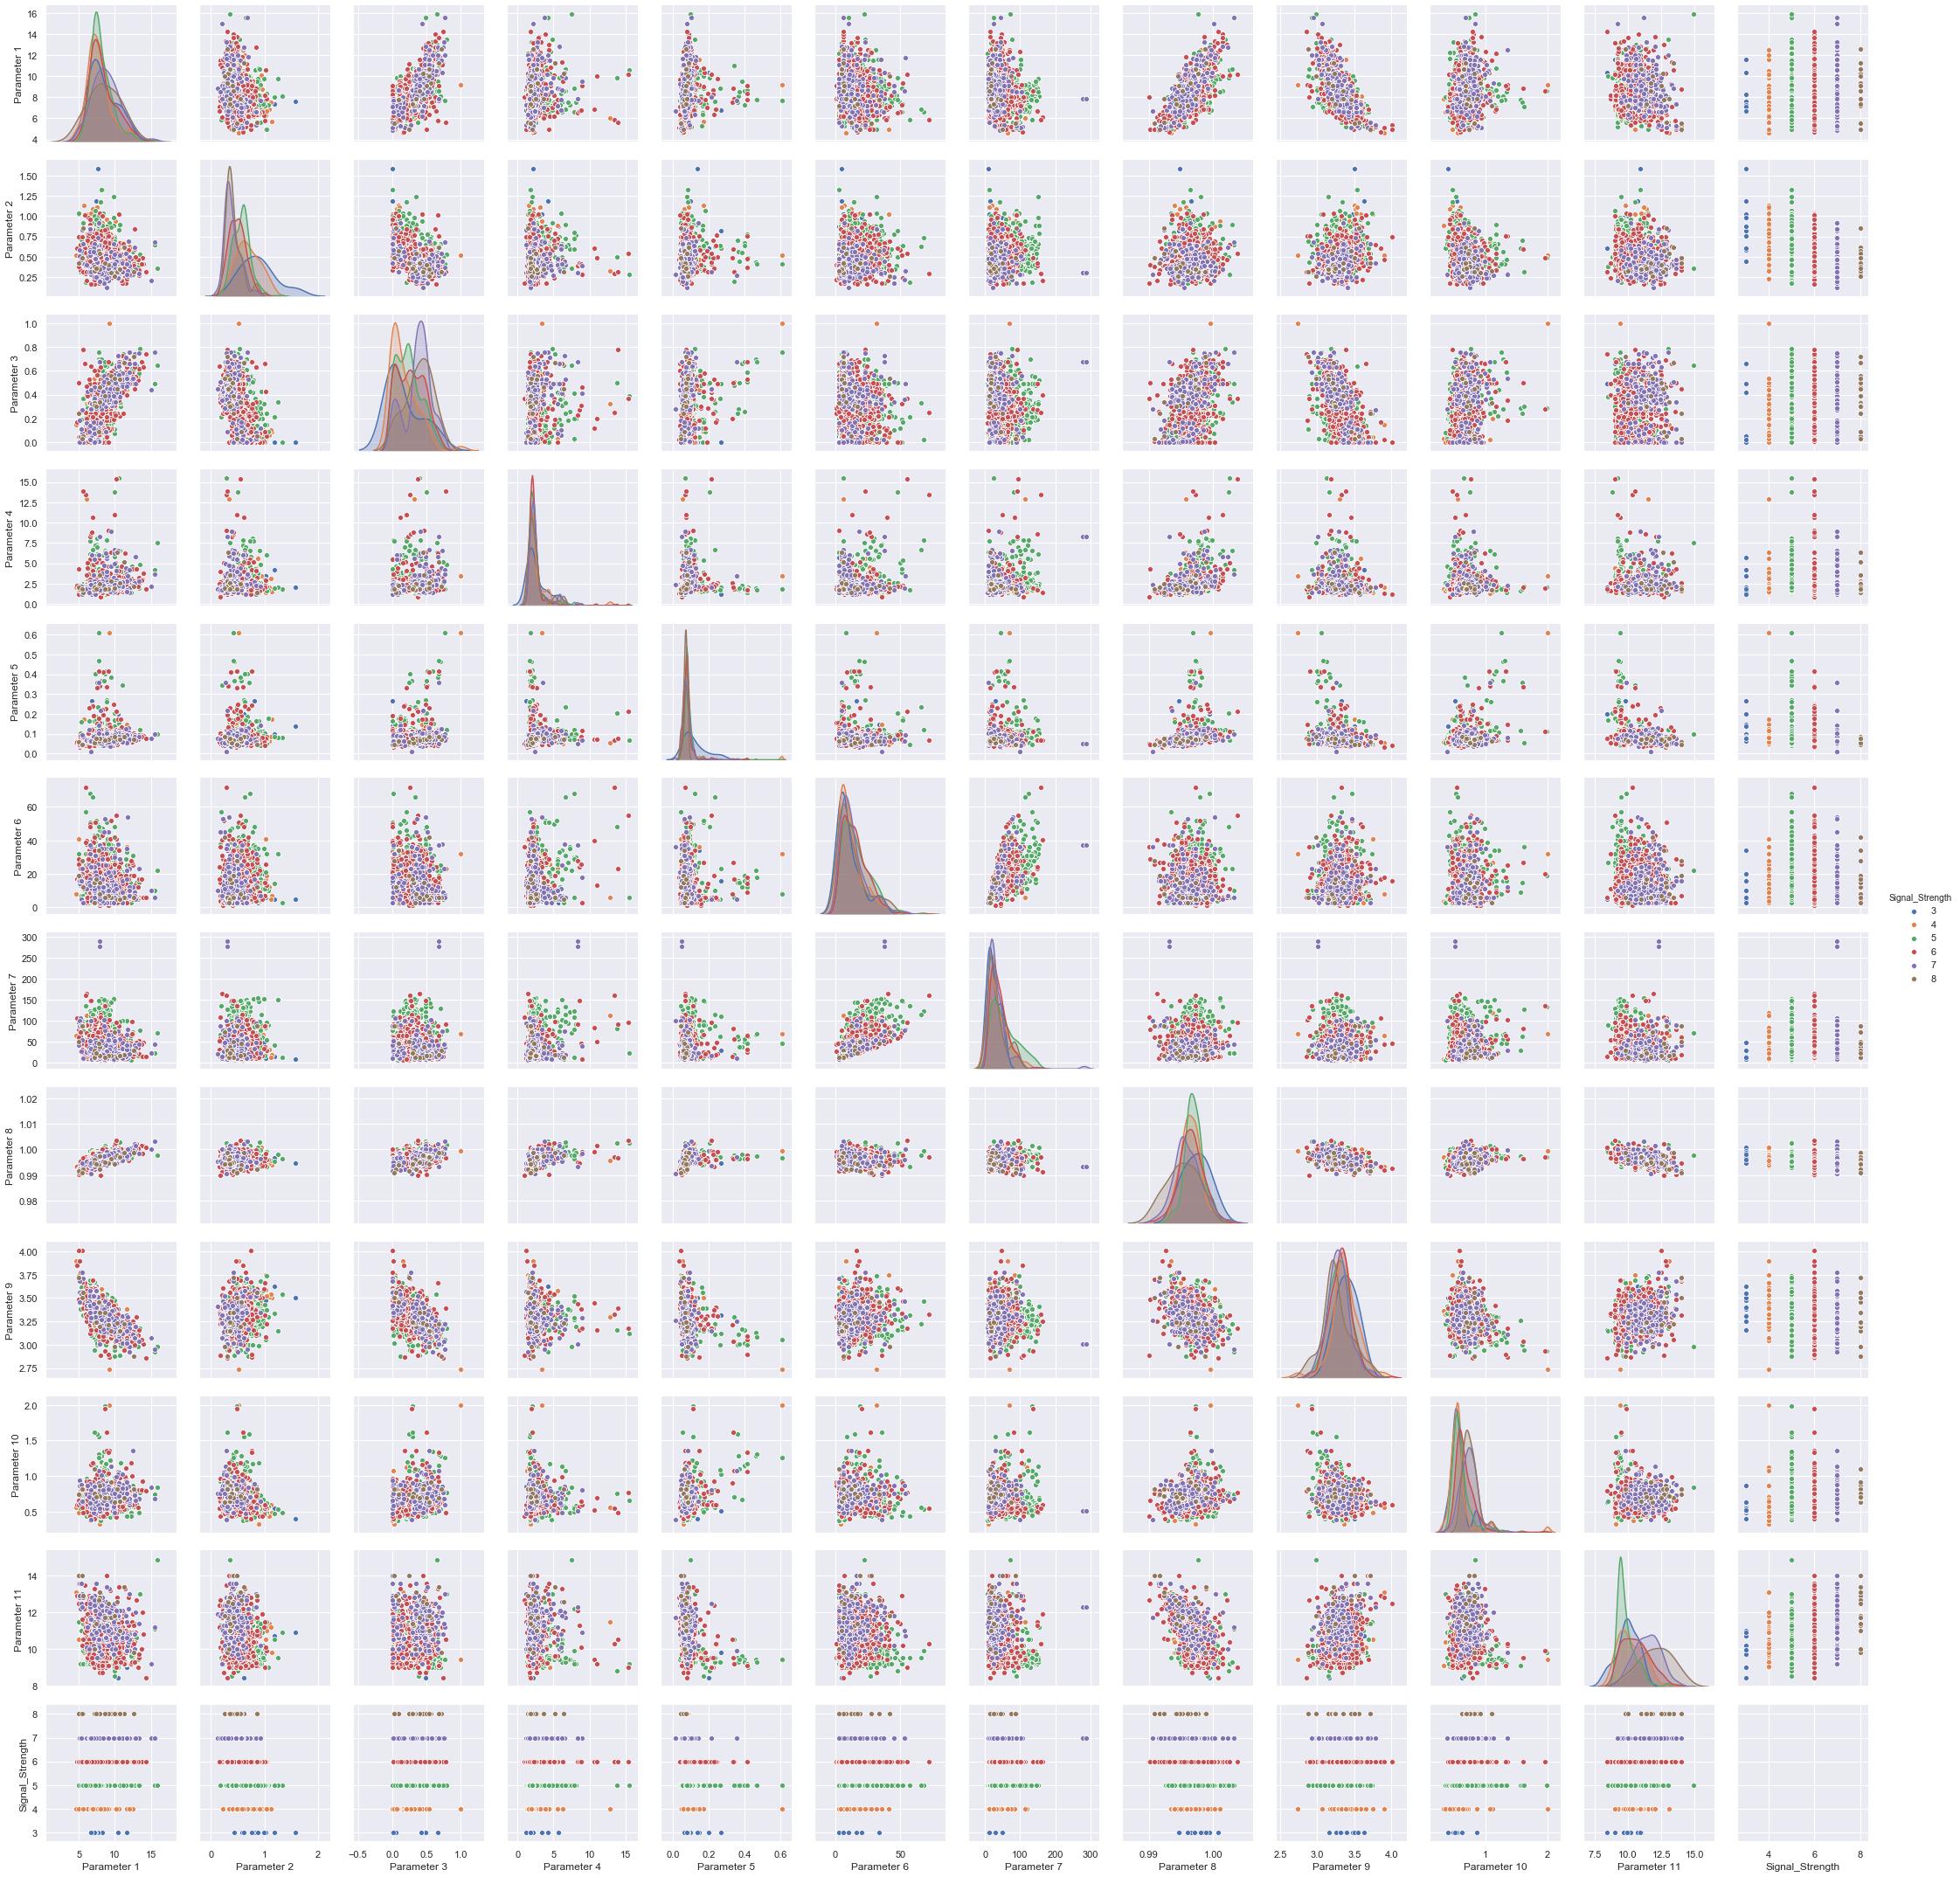

In [13]:
sns.pairplot(df,hue='Signal_Strength')

<b>Observation:</b>We can see some correlation between parameter 1 and parameter 8 but we need to check the correlation statistically

### Let us impute outliers detected through z-score method  with median

In [332]:
df1 = df.copy()

In [333]:
for column in df1.drop(columns=['Signal_Strength']).columns:
    df1[column] = df1[column].apply(lambda x: x if
                        ((x - df1[column].mean())/df1[column].std()) <= 3 
                        else
                        df1[column].median()
                        #np.nan
                       )

## Correlation Test

### Kbest method with chisquare

In [334]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [335]:
df1.shape

(1599, 12)

In [336]:
X = df1.drop(columns=['Signal_Strength'])
y = df1['Signal_Strength'].astype('int')

In [337]:
orderd_rank_features = SelectKBest(score_func=chi2, k=11)


In [338]:
orderd_rank_features.fit(X,y)

SelectKBest(k=11, score_func=<function chi2 at 0x00000000504C93A8>)

In [339]:
scores = pd.DataFrame(orderd_rank_features.scores_, columns=['Scores'])
features = pd.DataFrame(X.columns, columns=['Features'])
final = pd.concat([scores,features], axis=1)

In [340]:
final.nlargest(11,'Scores')

Scores      Features
6   2761.106769   Parameter 7
5    120.932364   Parameter 6
10    43.476995  Parameter 11
2     13.614614   Parameter 3
1     12.224059   Parameter 2
0      9.455325   Parameter 1
3      7.156913   Parameter 4
9      5.830052  Parameter 10
4      0.281285   Parameter 5
8      0.126300   Parameter 9
7      0.000214   Parameter 8

#### From above method we can find that Parameters 5 , 9 and 8 are least siginficant predictors. We will try to use the below dataset to create a model and check the performance

In [341]:
Kbest_features = df1.drop(columns=['Parameter 5','Parameter 9','Parameter 8']).copy()

### Feature importance using ensemble method

In [342]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

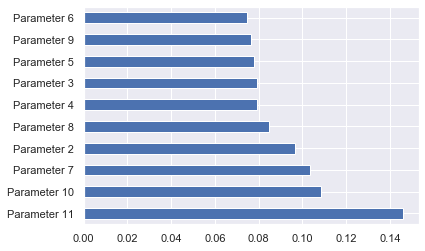

In [343]:
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')

#### from above plot we can see that except parameter 11 almost all features are equally important. So we will retain all columns in this case

### Variance Inflation factor

In [344]:
X = df.drop(columns=['Signal_Strength'])
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [345]:
vif_data

feature          VIF
0    Parameter 1    74.452265
1    Parameter 2    17.060026
2    Parameter 3     9.183495
3    Parameter 4     4.662992
4    Parameter 5     6.554877
5    Parameter 6     6.442682
6    Parameter 7     6.519699
7    Parameter 8  1479.287209
8    Parameter 9  1070.967685
9   Parameter 10    21.590621
10  Parameter 11   124.394866

### Pairplot after removing outliers

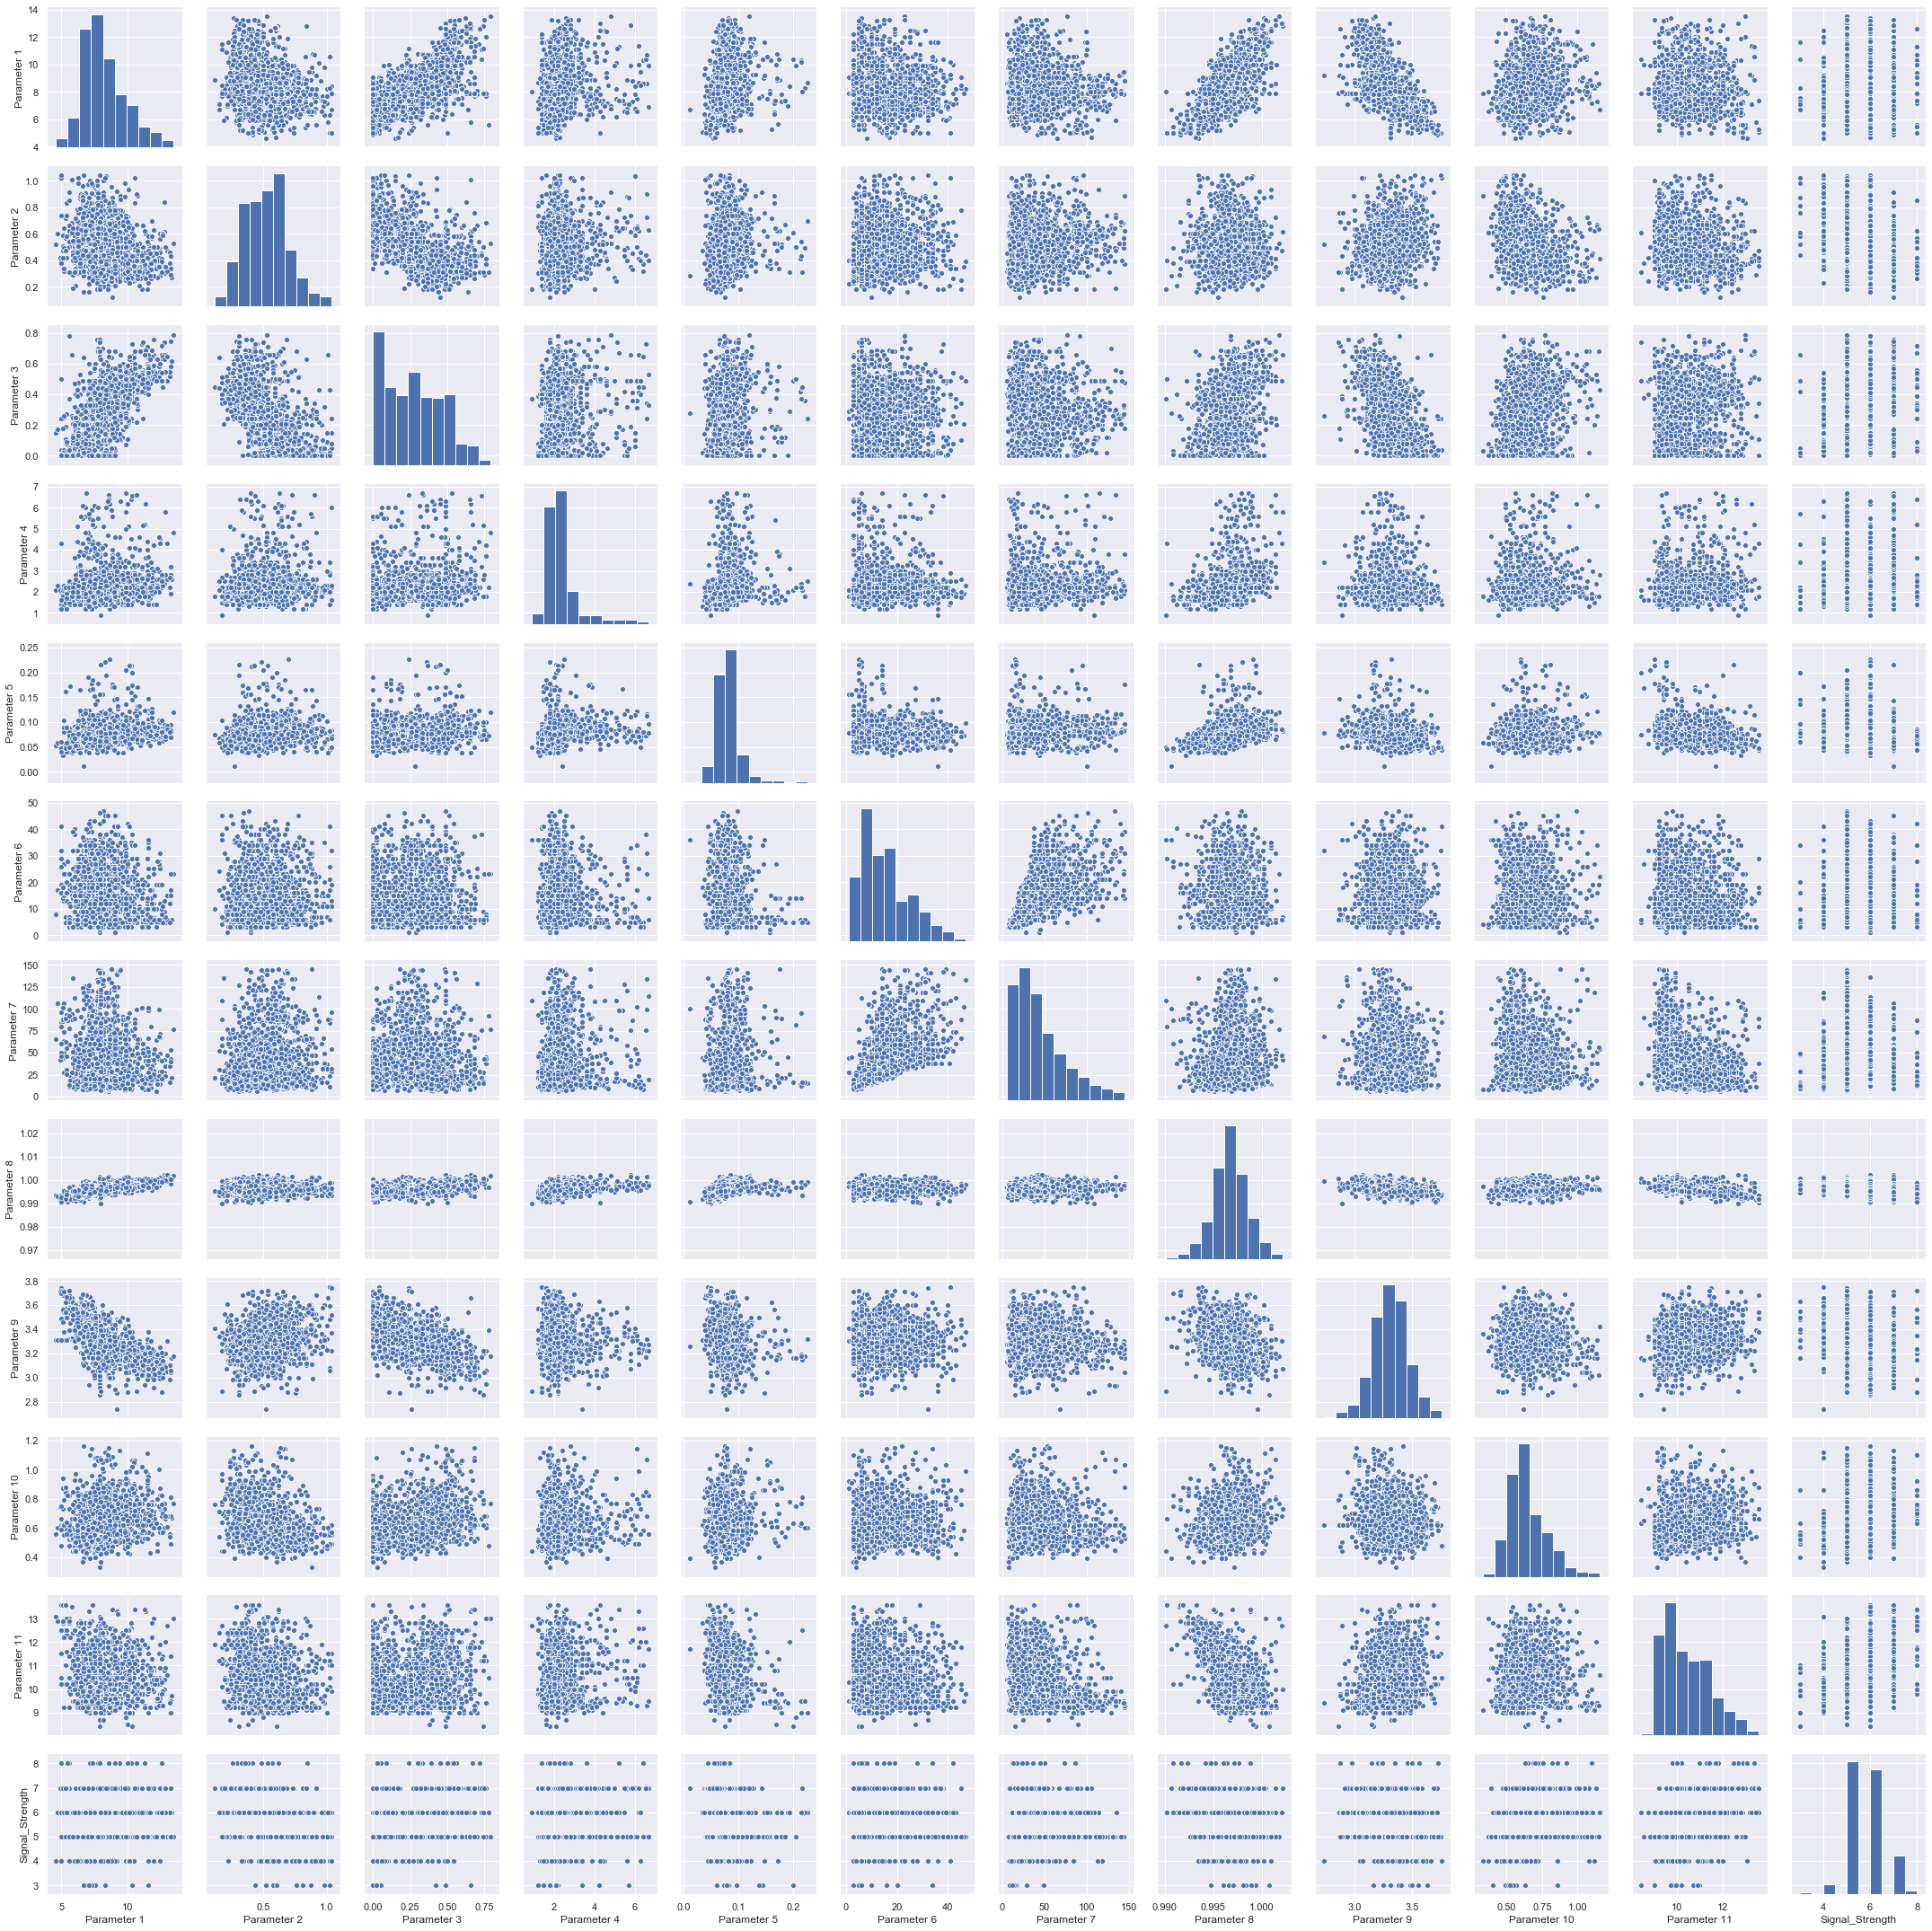

In [346]:
sns.pairplot(df1)

In [347]:
X = df1.drop(columns=['Signal_Strength'])
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [348]:
vif_data

feature          VIF
0    Parameter 1    67.525613
1    Parameter 2    17.700405
2    Parameter 3     8.259058
3    Parameter 4     9.553091
4    Parameter 5    16.211930
5    Parameter 6     6.542079
6    Parameter 7     6.370576
7    Parameter 8  1331.472877
8    Parameter 9   960.386214
9   Parameter 10    29.009573
10  Parameter 11   133.234695

<b>Observations:</b><li>After treating outliers we did not see much improvement in the VIF scores of the parameters.They continue to be very high(>5)<li>In order to solve multicolinearity problem we will use PCA.

### Standard Scaling

In [349]:
scaled = df1.copy()
for column in scaled.drop(columns=['Signal_Strength']).columns:
    scaled[column] = scaled[column].apply(lambda x:
                        (x - scaled[column].mean())/scaled[column].std()
                       )

### Finding the optimal number of principal components that could account for maximum variance in data

In [350]:
from sklearn.decomposition import PCA
features = list(scaled.drop(columns=['Signal_Strength']).columns)
pca = PCA(n_components=10)
pca.fit(np.array(scaled[features]))
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance,decimals = 3)*100)
var

array([27.4, 45.1, 59.4, 69.7, 77.9, 84.7, 89.9, 94. , 97. , 99.1])

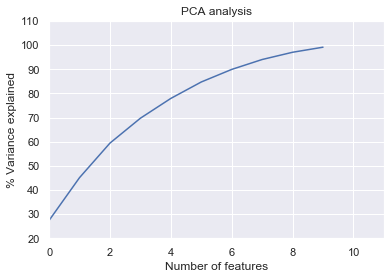

In [351]:
plt.ylabel("% Variance explained")
plt.xlabel("Number of features")
plt.title("PCA analysis")
plt.ylim(20,110)
plt.xlim(0,11)
plt.plot(var)

<b>Observations:</b> We could pick n_components = 6 as they account for 90% of variance in the dataset

In [352]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(np.array(scaled[features]))
pcDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6'])

In [353]:
finalDf = pd.concat([pcDf,scaled[['Signal_Strength']]], axis=1)

In [354]:
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 7 columns):
PC1                1599 non-null float64
PC2                1599 non-null float64
PC3                1599 non-null float64
PC4                1599 non-null float64
PC5                1599 non-null float64
PC6                1599 non-null float64
Signal_Strength    1599 non-null object
dtypes: float64(6), object(1)
memory usage: 87.6+ KB


In [355]:
finalDf['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3], dtype=object)

### Split the data

In [83]:
from keras.utils.np_utils import to_categorical
categorical_labels = to_categorical(finalDf['Signal_Strength'], num_classes=None)

In [84]:
len(categorical_labels[0])

9

In [85]:
finalDf

PC1       PC2       PC3       PC4       PC5       PC6  \
0     1.663006 -1.043868 -1.414160 -0.177092  0.475915 -1.056528   
1     0.846262 -2.201520 -0.042708  0.445265  0.145303  0.413887   
2     0.742628 -1.364816 -0.714728  0.068164  0.255632  0.095856   
3    -2.433041  0.010059  0.731094 -1.526152 -0.687085 -0.277802   
4     1.663006 -1.043868 -1.414160 -0.177092  0.475915 -1.056528   
...        ...       ...       ...       ...       ...       ...   
1594  2.282332 -0.572072  0.847368  0.008764  0.358428  0.682458   
1595  2.437299  0.228083  2.257227  0.697218  0.739969 -0.447815   
1596  1.527470  0.345618  1.232464  0.556543  0.799146 -0.068777   
1597  2.455420 -0.451180  1.099449  0.390267  1.083614 -0.438698   
1598  0.330841  1.277605  1.192040  1.086017 -0.399542 -0.058249   

     Signal_Strength  
0                  5  
1                  5  
2                  5  
3                  6  
4                  5  
...              ...  
1594               5  
1595               6  
1596               6  
1597               5  
1598               6  

[1599 rows x 7 columns]

In [133]:
xpca = finalDf.drop(columns=['Signal_Strength']).values
ypca = categorical_labels
X_train, X_test, y_train, y_test = train_test_split(xpca, ypca,test_size=0.33, random_state=42)

### Training the neural network on principal components 

In [134]:
model = Sequential()
model.add(Dense(32, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                224       
_________________________________________________________________
dropout_16 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 9)                 585       
Total params: 2,921
Trainable params: 2,921
Non-trainable params: 0
_________________________________________________________________


In [135]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [136]:
history = model.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=1, validation_split=0.2)

Train on 856 samples, validate on 215 samples
Epoch 1/150
856/856 [==============================] - 0s 403us/sample - loss: 1.8589 - acc: 0.4229 - val_loss: 1.4051 - val_acc: 0.5209
Epoch 2/150
856/856 [==============================] - 0s 120us/sample - loss: 1.3185 - acc: 0.4825 - val_loss: 1.0763 - val_acc: 0.6419
Epoch 3/150
856/856 [==============================] - 0s 124us/sample - loss: 1.1507 - acc: 0.5350 - val_loss: 1.0197 - val_acc: 0.6372
Epoch 4/150
856/856 [==============================] - 0s 120us/sample - loss: 1.1529 - acc: 0.5397 - val_loss: 0.9766 - val_acc: 0.6465
Epoch 5/150
856/856 [==============================] - 0s 182us/sample - loss: 1.1149 - acc: 0.5748 - val_loss: 0.9545 - val_acc: 0.6372
Epoch 6/150
856/856 [==============================] - 0s 132us/sample - loss: 1.1155 - acc: 0.5374 - val_loss: 0.9559 - val_acc: 0.6465
Epoch 7/150
856/856 [==============================] - 0s 204us/sample - loss: 1.0984 - acc: 0.5386 - val_loss: 0.9421 - val_acc: 0.

856/856 [==============================] - 0s 114us/sample - loss: 0.9694 - acc: 0.5888 - val_loss: 0.8735 - val_acc: 0.6465
Epoch 61/150
856/856 [==============================] - 0s 114us/sample - loss: 0.9825 - acc: 0.5771 - val_loss: 0.8709 - val_acc: 0.6558
Epoch 62/150
856/856 [==============================] - 0s 127us/sample - loss: 0.9681 - acc: 0.5888 - val_loss: 0.8697 - val_acc: 0.6512
Epoch 63/150
856/856 [==============================] - 0s 140us/sample - loss: 0.9670 - acc: 0.5923 - val_loss: 0.8739 - val_acc: 0.6326
Epoch 64/150
856/856 [==============================] - 0s 116us/sample - loss: 0.9857 - acc: 0.5900 - val_loss: 0.8758 - val_acc: 0.6605
Epoch 65/150
856/856 [==============================] - 0s 116us/sample - loss: 0.9751 - acc: 0.5911 - val_loss: 0.8686 - val_acc: 0.6605
Epoch 66/150
856/856 [==============================] - 0s 118us/sample - loss: 0.9737 - acc: 0.6040 - val_loss: 0.8712 - val_acc: 0.6651
Epoch 67/150
856/856 [=========================

856/856 [==============================] - 0s 140us/sample - loss: 0.9423 - acc: 0.6075 - val_loss: 0.8641 - val_acc: 0.6512
Epoch 120/150
856/856 [==============================] - 0s 130us/sample - loss: 0.9346 - acc: 0.6075 - val_loss: 0.8653 - val_acc: 0.6512
Epoch 121/150
856/856 [==============================] - 0s 138us/sample - loss: 0.9573 - acc: 0.5981 - val_loss: 0.8591 - val_acc: 0.6465
Epoch 122/150
856/856 [==============================] - 0s 140us/sample - loss: 0.9438 - acc: 0.6098 - val_loss: 0.8592 - val_acc: 0.6651
Epoch 123/150
856/856 [==============================] - 0s 117us/sample - loss: 0.9487 - acc: 0.6098 - val_loss: 0.8662 - val_acc: 0.6465
Epoch 124/150
856/856 [==============================] - 0s 116us/sample - loss: 0.9483 - acc: 0.5911 - val_loss: 0.8639 - val_acc: 0.6558
Epoch 125/150
856/856 [==============================] - 0s 125us/sample - loss: 0.9169 - acc: 0.6238 - val_loss: 0.8597 - val_acc: 0.6512
Epoch 126/150
856/856 [==================

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


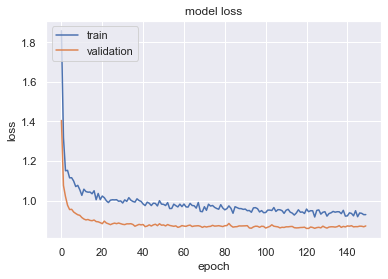

In [137]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [139]:
#y_pred = model.predict(X_test)
y_pred = model.predict_classes(X_test)

In [140]:
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]

In [144]:
y_train_classes = [np.argmax(y, axis=None, out=None) for y in y_train]

### Train features count

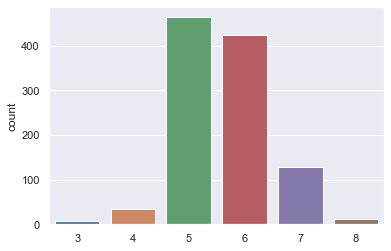

In [150]:
sns.countplot(y_train_classes)

### Test Features count

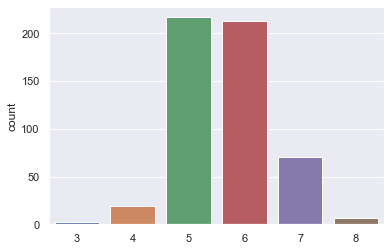

In [151]:
sns.countplot(y_classes)

### Prediction feature count

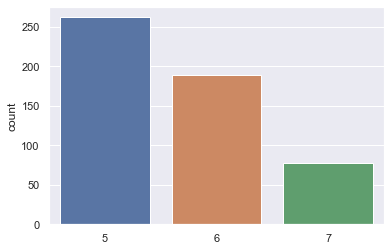

In [152]:
sns.countplot(y_pred)

In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_classes))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.75      0.62      0.68       262
           6       0.46      0.52      0.49       189
           7       0.53      0.48      0.50        77
           8       0.00      0.00      0.00         0

    accuracy                           0.56       528
   macro avg       0.29      0.27      0.28       528
weighted avg       0.61      0.56      0.59       528



<b>Observations:</b><li>Since, the data is heavily imbalanced we will use precion and recall scores to judge the predicatability of our model<li>The model trained on PCA can predict classes 5,6 and 7 with recall score ranging from 0.50 to 0.62 but it is not able to predict classes 3,4 and 8(which have lower count in the dataset) accurately. This brings the weighted average down to 0.56.

### Training neural net on original dataset

In [266]:
for column in df1.drop(columns=['Signal_Strength']).columns:
    df1[column] = df1[column].apply(lambda x:
                        (x - df1[column].mean())/df1[column].std()
                       )

In [267]:
categorical_labels = to_categorical(df1['Signal_Strength'], num_classes=None)

In [281]:
X = df1.drop(columns=['Signal_Strength']).values
Y = categorical_labels
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.33, random_state=42)

In [282]:
y_train_classes = [np.argmax(y, axis=None, out=None) for y in y_train]

In [283]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res,y_train_res = sm.fit_sample(X_train,y_train_classes)

In [284]:
y_train_res = to_categorical(y_train_res,num_classes=None)

In [285]:
y_train_classes = [np.argmax(y, axis=None, out=None) for y in y_train_res]

In [286]:
model1 = Sequential()
model1.add(Dense(20, input_dim=11, kernel_initializer='normal', activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(20, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(20, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(9, activation='softmax'))
model1.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 20)                240       
_________________________________________________________________
dropout_54 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_55 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_56 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_80 (Dense)             (None, 9)               

In [287]:
from tensorflow import keras
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
sgd = keras.optimizers.SGD(learning_rate=lr_schedule)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [288]:
history = model1.fit(X_train_res, y_train_res, epochs=200, batch_size=10,  verbose=1, validation_split=0.2)

Train on 2227 samples, validate on 557 samples
Epoch 1/200
2227/2227 [==============================] - 1s 393us/sample - loss: 2.0198 - acc: 0.2326 - val_loss: 2.5098 - val_acc: 0.1400
Epoch 2/200
2227/2227 [==============================] - 0s 154us/sample - loss: 1.7571 - acc: 0.3035 - val_loss: 3.0194 - val_acc: 0.0952
Epoch 3/200
2227/2227 [==============================] - 0s 161us/sample - loss: 1.5943 - acc: 0.3408 - val_loss: 3.5634 - val_acc: 0.0862
Epoch 4/200
2227/2227 [==============================] - 0s 156us/sample - loss: 1.4632 - acc: 0.3754 - val_loss: 4.1195 - val_acc: 0.0305
Epoch 5/200
2227/2227 [==============================] - 0s 154us/sample - loss: 1.3965 - acc: 0.4109 - val_loss: 4.4781 - val_acc: 0.1364
Epoch 6/200
2227/2227 [==============================] - 0s 154us/sample - loss: 1.3567 - acc: 0.4284 - val_loss: 4.5553 - val_acc: 0.1131
Epoch 7/200
2227/2227 [==============================] - 0s 159us/sample - loss: 1.3271 - acc: 0.4387 - val_loss: 4.768

2227/2227 [==============================] - 0s 180us/sample - loss: 0.9456 - acc: 0.6062 - val_loss: 3.4285 - val_acc: 0.1113
Epoch 60/200
2227/2227 [==============================] - 0s 176us/sample - loss: 0.9408 - acc: 0.6125 - val_loss: 3.4801 - val_acc: 0.1221
Epoch 61/200
2227/2227 [==============================] - 0s 190us/sample - loss: 0.9482 - acc: 0.6004 - val_loss: 3.3930 - val_acc: 0.0862
Epoch 62/200
2227/2227 [==============================] - 0s 167us/sample - loss: 0.9410 - acc: 0.5999 - val_loss: 3.2920 - val_acc: 0.1023
Epoch 63/200
2227/2227 [==============================] - 0s 172us/sample - loss: 0.9443 - acc: 0.6031 - val_loss: 3.3909 - val_acc: 0.1149
Epoch 64/200
2227/2227 [==============================] - 0s 186us/sample - loss: 0.9182 - acc: 0.6102 - val_loss: 3.4333 - val_acc: 0.1095
Epoch 65/200
2227/2227 [==============================] - 0s 196us/sample - loss: 0.9334 - acc: 0.6062 - val_loss: 3.4077 - val_acc: 0.1167
Epoch 66/200
2227/2227 [=========

2227/2227 [==============================] - 0s 159us/sample - loss: 0.8428 - acc: 0.6484 - val_loss: 2.8989 - val_acc: 0.1239
Epoch 118/200
2227/2227 [==============================] - 0s 150us/sample - loss: 0.8299 - acc: 0.6502 - val_loss: 2.8866 - val_acc: 0.1257
Epoch 119/200
2227/2227 [==============================] - 0s 149us/sample - loss: 0.8310 - acc: 0.6596 - val_loss: 2.8615 - val_acc: 0.1239
Epoch 120/200
2227/2227 [==============================] - 0s 154us/sample - loss: 0.8366 - acc: 0.6493 - val_loss: 2.9820 - val_acc: 0.1221
Epoch 121/200
2227/2227 [==============================] - 0s 154us/sample - loss: 0.8372 - acc: 0.6489 - val_loss: 2.9054 - val_acc: 0.1185
Epoch 122/200
2227/2227 [==============================] - 0s 151us/sample - loss: 0.8539 - acc: 0.6363 - val_loss: 3.0316 - val_acc: 0.1185
Epoch 123/200
2227/2227 [==============================] - 0s 152us/sample - loss: 0.8532 - acc: 0.6471 - val_loss: 2.8192 - val_acc: 0.1095
Epoch 124/200
2227/2227 [==

2227/2227 [==============================] - 0s 198us/sample - loss: 0.8079 - acc: 0.6587 - val_loss: 2.9178 - val_acc: 0.1311
Epoch 176/200
2227/2227 [==============================] - 1s 291us/sample - loss: 0.7927 - acc: 0.6614 - val_loss: 2.8788 - val_acc: 0.1185
Epoch 177/200
2227/2227 [==============================] - 1s 400us/sample - loss: 0.8078 - acc: 0.6677 - val_loss: 2.9075 - val_acc: 0.1311
Epoch 178/200
2227/2227 [==============================] - 1s 342us/sample - loss: 0.7894 - acc: 0.6664 - val_loss: 2.8090 - val_acc: 0.1239
Epoch 179/200
2227/2227 [==============================] - 1s 407us/sample - loss: 0.8075 - acc: 0.6551 - val_loss: 2.8345 - val_acc: 0.1293
Epoch 180/200
2227/2227 [==============================] - 0s 179us/sample - loss: 0.7876 - acc: 0.6641 - val_loss: 2.9235 - val_acc: 0.1311
Epoch 181/200
2227/2227 [==============================] - 0s 222us/sample - loss: 0.8286 - acc: 0.6628 - val_loss: 2.9205 - val_acc: 0.1293
Epoch 182/200
2227/2227 [==

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


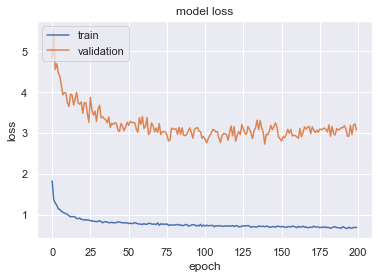

In [276]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [289]:
y_pred = model1.predict_classes(X_test)
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]

In [290]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_classes))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.47      0.09      0.15       100
           5       0.47      0.66      0.55       156
           6       0.41      0.52      0.46       168
           7       0.61      0.43      0.51        99
           8       0.00      0.00      0.00         0

    accuracy                           0.46       528
   macro avg       0.33      0.28      0.28       528
weighted avg       0.48      0.46      0.43       528



### Training neural net on dataset obtained after applying Kbest algo

In [389]:
for column in Kbest_features.drop(columns=['Signal_Strength']).columns:
    Kbest_features[column] = Kbest_features[column].apply(lambda x:
                        (x - Kbest_features[column].mean())/Kbest_features[column].std()
                       )

In [292]:
categorical_labels = to_categorical(Kbest_features['Signal_Strength'], num_classes=None)

In [293]:
X = Kbest_features.drop(columns=['Signal_Strength']).values
Y = categorical_labels
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.33, random_state=42)

In [294]:
model_k = Sequential()
model_k.add(Dense(32, input_dim=8, kernel_initializer='normal', activation='relu'))
model_k.add(Dropout(0.5))
model_k.add(Dense(64, activation='relu'))
model_k.add(Dropout(0.5))
model_k.add(Dense(9, activation='softmax'))
model_k.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 32)                288       
_________________________________________________________________
dropout_57 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_82 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_58 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_83 (Dense)             (None, 9)                 585       
Total params: 2,985
Trainable params: 2,985
Non-trainable params: 0
_________________________________________________________________


In [295]:
model_k.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [296]:
history = model_k.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=1, validation_split=0.2)

Train on 856 samples, validate on 215 samples
Epoch 1/150
856/856 [==============================] - 1s 759us/sample - loss: 1.9172 - acc: 0.3832 - val_loss: 1.5205 - val_acc: 0.3767
Epoch 2/150
856/856 [==============================] - 0s 167us/sample - loss: 1.3300 - acc: 0.4626 - val_loss: 1.1418 - val_acc: 0.5953
Epoch 3/150
856/856 [==============================] - 0s 179us/sample - loss: 1.1827 - acc: 0.4977 - val_loss: 1.0345 - val_acc: 0.6372
Epoch 4/150
856/856 [==============================] - 0s 192us/sample - loss: 1.1280 - acc: 0.5491 - val_loss: 0.9867 - val_acc: 0.6326
Epoch 5/150
856/856 [==============================] - 0s 180us/sample - loss: 1.1016 - acc: 0.5549 - val_loss: 0.9572 - val_acc: 0.6558
Epoch 6/150
856/856 [==============================] - 0s 172us/sample - loss: 1.0473 - acc: 0.5783 - val_loss: 0.9303 - val_acc: 0.6512
Epoch 7/150
856/856 [==============================] - 0s 168us/sample - loss: 1.0909 - acc: 0.5502 - val_loss: 0.9269 - val_acc: 0.

856/856 [==============================] - 0s 209us/sample - loss: 0.9706 - acc: 0.6051 - val_loss: 0.8541 - val_acc: 0.6977
Epoch 61/150
856/856 [==============================] - 0s 157us/sample - loss: 0.9567 - acc: 0.5993 - val_loss: 0.8493 - val_acc: 0.6837
Epoch 62/150
856/856 [==============================] - 0s 210us/sample - loss: 0.9625 - acc: 0.5958 - val_loss: 0.8413 - val_acc: 0.6977
Epoch 63/150
856/856 [==============================] - 0s 183us/sample - loss: 0.9482 - acc: 0.6016 - val_loss: 0.8442 - val_acc: 0.6930
Epoch 64/150
856/856 [==============================] - 0s 200us/sample - loss: 0.9584 - acc: 0.6005 - val_loss: 0.8424 - val_acc: 0.7023
Epoch 65/150
856/856 [==============================] - 0s 162us/sample - loss: 0.9620 - acc: 0.6005 - val_loss: 0.8546 - val_acc: 0.6791
Epoch 66/150
856/856 [==============================] - 0s 171us/sample - loss: 0.9620 - acc: 0.6051 - val_loss: 0.8455 - val_acc: 0.6930
Epoch 67/150
856/856 [=========================

856/856 [==============================] - 0s 176us/sample - loss: 0.9398 - acc: 0.6110 - val_loss: 0.8461 - val_acc: 0.6744
Epoch 120/150
856/856 [==============================] - 0s 180us/sample - loss: 0.9427 - acc: 0.6180 - val_loss: 0.8496 - val_acc: 0.6791
Epoch 121/150
856/856 [==============================] - 0s 173us/sample - loss: 0.9376 - acc: 0.6086 - val_loss: 0.8506 - val_acc: 0.6744
Epoch 122/150
856/856 [==============================] - 0s 168us/sample - loss: 0.9443 - acc: 0.6180 - val_loss: 0.8426 - val_acc: 0.6837
Epoch 123/150
856/856 [==============================] - 0s 173us/sample - loss: 0.9215 - acc: 0.6262 - val_loss: 0.8454 - val_acc: 0.6837
Epoch 124/150
856/856 [==============================] - 0s 185us/sample - loss: 0.9168 - acc: 0.6086 - val_loss: 0.8461 - val_acc: 0.7023
Epoch 125/150
856/856 [==============================] - 0s 167us/sample - loss: 0.9398 - acc: 0.6110 - val_loss: 0.8507 - val_acc: 0.6930
Epoch 126/150
856/856 [==================

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


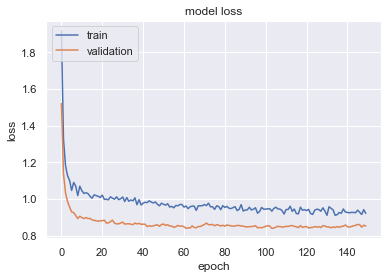

In [297]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [299]:
y_pred = model_k.predict_classes(X_test)
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]

In [300]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_classes))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.80      0.62      0.70       280
           6       0.47      0.54      0.50       188
           7       0.39      0.45      0.42        60
           8       0.00      0.00      0.00         0

    accuracy                           0.57       528
   macro avg       0.28      0.27      0.27       528
weighted avg       0.64      0.57      0.60       528



<b>Conclusion:</b><li> We tried to train our model on PCA dataset ,on features truncated using kbest algo and extratree classifier. <li> We also tried to balance our classes using overampling algorithm 'SMOTE'<li> All the above approaches failed to produce any significant improvement in the accuracy of our model. <li> Next we will try to apply some feature engineering and classify our dependent variable into 3 classes i.e high, medium and low. <li> The major of advantage of this approach would be that it would not only reduce the number of classes but will also accomodate the other signal strength values that are either not one of these numbers or are in decimal format.

## Categorising the signal strengths

In [356]:
df2 = df1.copy()

In [357]:
def categorise_signal(row):
    if row >= 7:
        return 3
    elif row <=4:
        return 1
    else:
        return 2
df2['Signal_Strength'] = df2['Signal_Strength'].apply(categorise_signal)

In [358]:
df2['Signal_Strength'].value_counts()

2    1319
3     217
1      63
Name: Signal_Strength, dtype: int64

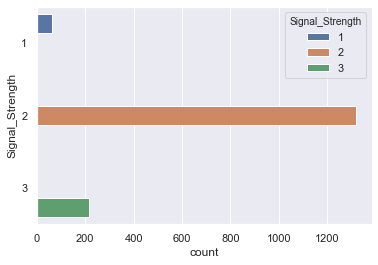

In [359]:
sns.countplot(y='Signal_Strength',hue='Signal_Strength', data=df2)

In [367]:
def create_model(input_dim,output_dim):
    model = Sequential()
    model.add(Dense(32, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(output_dim, activation='softmax'))
    print(model.summary())
    return model

### Training on Principal Components

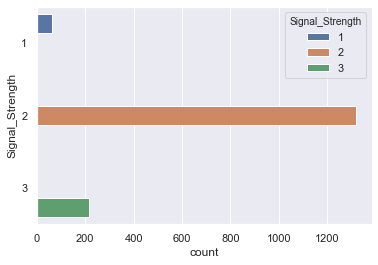

In [360]:
finalDf['Signal_Strength'] = finalDf['Signal_Strength'].apply(categorise_signal)
sns.countplot(y='Signal_Strength',hue='Signal_Strength', data=finalDf)

In [361]:
from keras.utils.np_utils import to_categorical
categorical_labels = to_categorical(finalDf['Signal_Strength'], num_classes=None)
xpca = finalDf.drop(columns=['Signal_Strength']).values
ypca = categorical_labels
X_train, X_test, y_train, y_test = train_test_split(xpca, ypca,test_size=0.33, random_state=42)
y_train_classes = [np.argmax(y, axis=None, out=None) for y in y_train]
sm = SMOTE(random_state=2)
X_train_res,y_train_res = sm.fit_sample(X_train,y_train_classes)

In [380]:
y_train_res = to_categorical(y_train_res,num_classes=None)

### training the model without upsampling

In [370]:
model = create_model(6,4)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 32)                224       
_________________________________________________________________
dropout_63 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_91 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_64 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 4)                 260       
Total params: 2,596
Trainable params: 2,596
Non-trainable params: 0
_________________________________________________________________
None


In [371]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=1, validation_split=0.2)

Train on 856 samples, validate on 215 samples
Epoch 1/150
856/856 [==============================] - 1s 815us/sample - loss: 1.1546 - acc: 0.6589 - val_loss: 0.7890 - val_acc: 0.8326
Epoch 2/150
856/856 [==============================] - 0s 202us/sample - loss: 0.6574 - acc: 0.8318 - val_loss: 0.5210 - val_acc: 0.8326
Epoch 3/150
856/856 [==============================] - 0s 209us/sample - loss: 0.5810 - acc: 0.8259 - val_loss: 0.4785 - val_acc: 0.8372
Epoch 4/150
856/856 [==============================] - 0s 164us/sample - loss: 0.5240 - acc: 0.8306 - val_loss: 0.4618 - val_acc: 0.8558
Epoch 5/150
856/856 [==============================] - 0s 238us/sample - loss: 0.4988 - acc: 0.8364 - val_loss: 0.4453 - val_acc: 0.8605
Epoch 6/150
856/856 [==============================] - 0s 162us/sample - loss: 0.5097 - acc: 0.8271 - val_loss: 0.4337 - val_acc: 0.8605
Epoch 7/150
856/856 [==============================] - 0s 168us/sample - loss: 0.4758 - acc: 0.8470 - val_loss: 0.4222 - val_acc: 0.

856/856 [==============================] - 0s 164us/sample - loss: 0.4136 - acc: 0.8481 - val_loss: 0.3945 - val_acc: 0.8419
Epoch 61/150
856/856 [==============================] - 0s 172us/sample - loss: 0.4208 - acc: 0.8435 - val_loss: 0.3967 - val_acc: 0.8465
Epoch 62/150
856/856 [==============================] - 0s 228us/sample - loss: 0.4415 - acc: 0.8423 - val_loss: 0.3978 - val_acc: 0.8465
Epoch 63/150
856/856 [==============================] - 0s 164us/sample - loss: 0.4108 - acc: 0.8435 - val_loss: 0.3915 - val_acc: 0.8512
Epoch 64/150
856/856 [==============================] - 0s 154us/sample - loss: 0.4105 - acc: 0.8540 - val_loss: 0.3945 - val_acc: 0.8465
Epoch 65/150
856/856 [==============================] - 0s 230us/sample - loss: 0.4190 - acc: 0.8376 - val_loss: 0.3906 - val_acc: 0.8419
Epoch 66/150
856/856 [==============================] - 0s 172us/sample - loss: 0.4183 - acc: 0.8470 - val_loss: 0.3879 - val_acc: 0.8558
Epoch 67/150
856/856 [=========================

856/856 [==============================] - 0s 188us/sample - loss: 0.3888 - acc: 0.8516 - val_loss: 0.3891 - val_acc: 0.8558
Epoch 120/150
856/856 [==============================] - 0s 169us/sample - loss: 0.3809 - acc: 0.8551 - val_loss: 0.3905 - val_acc: 0.8512
Epoch 121/150
856/856 [==============================] - 0s 165us/sample - loss: 0.3894 - acc: 0.8446 - val_loss: 0.3901 - val_acc: 0.8605
Epoch 122/150
856/856 [==============================] - 0s 173us/sample - loss: 0.4069 - acc: 0.8563 - val_loss: 0.3871 - val_acc: 0.8651
Epoch 123/150
856/856 [==============================] - 0s 173us/sample - loss: 0.3918 - acc: 0.8563 - val_loss: 0.3863 - val_acc: 0.8744
Epoch 124/150
856/856 [==============================] - 0s 176us/sample - loss: 0.3945 - acc: 0.8516 - val_loss: 0.3886 - val_acc: 0.8651
Epoch 125/150
856/856 [==============================] - 0s 162us/sample - loss: 0.3871 - acc: 0.8598 - val_loss: 0.3886 - val_acc: 0.8512
Epoch 126/150
856/856 [==================

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


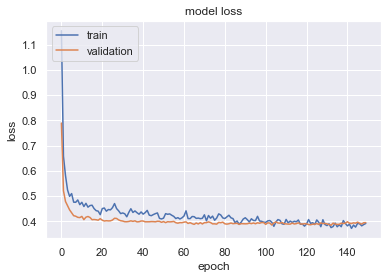

In [372]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [374]:
y_pred = model.predict_classes(X_test)
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
print(classification_report(y_pred,y_classes))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.94      0.85      0.89       474
           3       0.36      0.52      0.43        54

    accuracy                           0.82       528
   macro avg       0.43      0.46      0.44       528
weighted avg       0.88      0.82      0.85       528



### Training after applying SMOTE

In [382]:
model_s = create_model(6,4)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 32)                224       
_________________________________________________________________
dropout_69 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_100 (Dense)            (None, 64)                2112      
_________________________________________________________________
dropout_70 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_101 (Dense)            (None, 4)                 260       
Total params: 2,596
Trainable params: 2,596
Non-trainable params: 0
_________________________________________________________________
None


In [383]:
model_s.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_s.fit(X_train_res, y_train_res, epochs=150, batch_size=10,  verbose=1, validation_split=0.2)

Train on 2133 samples, validate on 534 samples
Epoch 1/150
2133/2133 [==============================] - 1s 410us/sample - loss: 1.0997 - acc: 0.4552 - val_loss: 1.0309 - val_acc: 0.6461
Epoch 2/150
2133/2133 [==============================] - 0s 161us/sample - loss: 0.8112 - acc: 0.6010 - val_loss: 0.7800 - val_acc: 0.7097
Epoch 3/150
2133/2133 [==============================] - 0s 171us/sample - loss: 0.7646 - acc: 0.6057 - val_loss: 0.7869 - val_acc: 0.6891
Epoch 4/150
2133/2133 [==============================] - 0s 158us/sample - loss: 0.7566 - acc: 0.6278 - val_loss: 0.7468 - val_acc: 0.7116
Epoch 5/150
2133/2133 [==============================] - 0s 166us/sample - loss: 0.7297 - acc: 0.6385 - val_loss: 0.7945 - val_acc: 0.7041
Epoch 6/150
2133/2133 [==============================] - 0s 159us/sample - loss: 0.7195 - acc: 0.6362 - val_loss: 0.7181 - val_acc: 0.7378
Epoch 7/150
2133/2133 [==============================] - 0s 180us/sample - loss: 0.6941 - acc: 0.6535 - val_loss: 0.755

2133/2133 [==============================] - 0s 185us/sample - loss: 0.5756 - acc: 0.7342 - val_loss: 0.7120 - val_acc: 0.7547
Epoch 60/150
2133/2133 [==============================] - 0s 200us/sample - loss: 0.5799 - acc: 0.7262 - val_loss: 0.6491 - val_acc: 0.7921
Epoch 61/150
2133/2133 [==============================] - 0s 180us/sample - loss: 0.5747 - acc: 0.7253 - val_loss: 0.6695 - val_acc: 0.7753
Epoch 62/150
2133/2133 [==============================] - 0s 166us/sample - loss: 0.5624 - acc: 0.7482 - val_loss: 0.6905 - val_acc: 0.7790
Epoch 63/150
2133/2133 [==============================] - 0s 171us/sample - loss: 0.5792 - acc: 0.7304 - val_loss: 0.6746 - val_acc: 0.7772
Epoch 64/150
2133/2133 [==============================] - 0s 162us/sample - loss: 0.5763 - acc: 0.7304 - val_loss: 0.6191 - val_acc: 0.8090
Epoch 65/150
2133/2133 [==============================] - 0s 205us/sample - loss: 0.5717 - acc: 0.7459 - val_loss: 0.6879 - val_acc: 0.7584
Epoch 66/150
2133/2133 [=========

2133/2133 [==============================] - 0s 166us/sample - loss: 0.5298 - acc: 0.7679 - val_loss: 0.6394 - val_acc: 0.7884
Epoch 118/150
2133/2133 [==============================] - 0s 183us/sample - loss: 0.5407 - acc: 0.7562 - val_loss: 0.6082 - val_acc: 0.8015
Epoch 119/150
2133/2133 [==============================] - 0s 179us/sample - loss: 0.5084 - acc: 0.7675 - val_loss: 0.5900 - val_acc: 0.8258
Epoch 120/150
2133/2133 [==============================] - 0s 159us/sample - loss: 0.5388 - acc: 0.7600 - val_loss: 0.6794 - val_acc: 0.7453
Epoch 121/150
2133/2133 [==============================] - 0s 159us/sample - loss: 0.5517 - acc: 0.7557 - val_loss: 0.6755 - val_acc: 0.7622
Epoch 122/150
2133/2133 [==============================] - 0s 157us/sample - loss: 0.5428 - acc: 0.7628 - val_loss: 0.6361 - val_acc: 0.8090
Epoch 123/150
2133/2133 [==============================] - 0s 165us/sample - loss: 0.5234 - acc: 0.7628 - val_loss: 0.6152 - val_acc: 0.8202
Epoch 124/150
2133/2133 [==

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


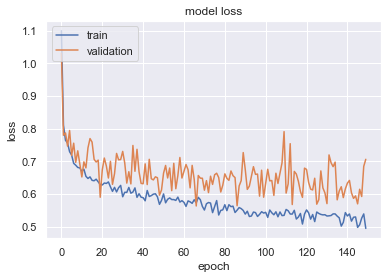

In [385]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [386]:
y_pred = model_s.predict_classes(X_test)
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
print(classification_report(y_pred,y_classes))

              precision    recall  f1-score   support

           1       0.52      0.09      0.16       119
           2       0.67      0.89      0.76       322
           3       0.55      0.48      0.51        87

    accuracy                           0.64       528
   macro avg       0.58      0.49      0.48       528
weighted avg       0.61      0.64      0.58       528



#### After we applied feature engineering to categorise the target variables a bit more broadly the average weighted f1 score jumped up 0.85. Also the recall score in case of medium strength signal has impeoved alot. Also we do not need to balance the dataset as after apply SMOTE there was not sny improvement noticed

In [390]:
Kbest_features['Signal_Strength'] = Kbest_features['Signal_Strength'].apply(categorise_signal)
categorical_labels = to_categorical(Kbest_features['Signal_Strength'], num_classes=None)
X = Kbest_features.drop(columns=['Signal_Strength']).values
Y = categorical_labels
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.33, random_state=42)

In [395]:
model_k = create_model(8,4)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 32)                288       
_________________________________________________________________
dropout_71 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_103 (Dense)            (None, 64)                2112      
_________________________________________________________________
dropout_72 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_104 (Dense)            (None, 4)                 260       
Total params: 2,660
Trainable params: 2,660
Non-trainable params: 0
_________________________________________________________________
None


In [397]:
model_k.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_k.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=1, validation_split=0.2)

Train on 856 samples, validate on 215 samples
Epoch 1/150
856/856 [==============================] - 1s 860us/sample - loss: 1.0180 - acc: 0.7547 - val_loss: 0.6404 - val_acc: 0.8326
Epoch 2/150
856/856 [==============================] - 0s 216us/sample - loss: 0.5949 - acc: 0.8294 - val_loss: 0.5275 - val_acc: 0.8326
Epoch 3/150
856/856 [==============================] - 0s 175us/sample - loss: 0.5337 - acc: 0.8353 - val_loss: 0.4949 - val_acc: 0.8326
Epoch 4/150
856/856 [==============================] - 0s 190us/sample - loss: 0.5141 - acc: 0.8329 - val_loss: 0.4734 - val_acc: 0.8372
Epoch 5/150
856/856 [==============================] - 0s 178us/sample - loss: 0.5042 - acc: 0.8259 - val_loss: 0.4574 - val_acc: 0.8419
Epoch 6/150
856/856 [==============================] - 0s 174us/sample - loss: 0.4839 - acc: 0.8166 - val_loss: 0.4414 - val_acc: 0.8558
Epoch 7/150
856/856 [==============================] - 0s 172us/sample - loss: 0.4858 - acc: 0.8271 - val_loss: 0.4307 - val_acc: 0.

856/856 [==============================] - 0s 174us/sample - loss: 0.4226 - acc: 0.8516 - val_loss: 0.3979 - val_acc: 0.8512
Epoch 61/150
856/856 [==============================] - 0s 160us/sample - loss: 0.4153 - acc: 0.8575 - val_loss: 0.3882 - val_acc: 0.8605
Epoch 62/150
856/856 [==============================] - 0s 248us/sample - loss: 0.4337 - acc: 0.8388 - val_loss: 0.3874 - val_acc: 0.8605
Epoch 63/150
856/856 [==============================] - 0s 202us/sample - loss: 0.3934 - acc: 0.8516 - val_loss: 0.3882 - val_acc: 0.8605
Epoch 64/150
856/856 [==============================] - 0s 169us/sample - loss: 0.4061 - acc: 0.8481 - val_loss: 0.3862 - val_acc: 0.8558
Epoch 65/150
856/856 [==============================] - 0s 194us/sample - loss: 0.4099 - acc: 0.8435 - val_loss: 0.3902 - val_acc: 0.8605
Epoch 66/150
856/856 [==============================] - 0s 188us/sample - loss: 0.4169 - acc: 0.8446 - val_loss: 0.3924 - val_acc: 0.8558
Epoch 67/150
856/856 [=========================

856/856 [==============================] - 0s 232us/sample - loss: 0.3866 - acc: 0.8633 - val_loss: 0.3816 - val_acc: 0.8651
Epoch 120/150
856/856 [==============================] - 0s 227us/sample - loss: 0.3910 - acc: 0.8481 - val_loss: 0.3816 - val_acc: 0.8651
Epoch 121/150
856/856 [==============================] - 0s 175us/sample - loss: 0.3824 - acc: 0.8516 - val_loss: 0.3841 - val_acc: 0.8605
Epoch 122/150
856/856 [==============================] - 0s 178us/sample - loss: 0.3866 - acc: 0.8633 - val_loss: 0.3807 - val_acc: 0.8651
Epoch 123/150
856/856 [==============================] - 0s 171us/sample - loss: 0.3867 - acc: 0.8516 - val_loss: 0.3832 - val_acc: 0.8558
Epoch 124/150
856/856 [==============================] - 0s 236us/sample - loss: 0.3871 - acc: 0.8575 - val_loss: 0.3846 - val_acc: 0.8605
Epoch 125/150
856/856 [==============================] - 0s 204us/sample - loss: 0.4017 - acc: 0.8481 - val_loss: 0.3897 - val_acc: 0.8558
Epoch 126/150
856/856 [==================

In [398]:
y_pred = model_k.predict_classes(X_test)
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
print(classification_report(y_pred,y_classes))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.94      0.84      0.89       482
           3       0.27      0.46      0.34        46

    accuracy                           0.81       528
   macro avg       0.40      0.43      0.41       528
weighted avg       0.88      0.81      0.84       528



### Training on normal dataset

In [409]:
df2 = df1.copy()

In [412]:
df2['Signal_Strength'] = df2['Signal_Strength'].apply(categorise_signal)
categorical_labels = to_categorical(df2['Signal_Strength'], num_classes=None)
X = df2.drop(columns=['Signal_Strength']).values
Y = categorical_labels
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.33, random_state=42)

In [414]:
model1 = create_model(11,4)

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 32)                384       
_________________________________________________________________
dropout_75 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_109 (Dense)            (None, 64)                2112      
_________________________________________________________________
dropout_76 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 4)                 260       
Total params: 2,756
Trainable params: 2,756
Non-trainable params: 0
_________________________________________________________________
None


In [415]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model1.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=1, validation_split=0.2)

Train on 856 samples, validate on 215 samples
Epoch 1/150
856/856 [==============================] - 1s 895us/sample - loss: 1.2093 - acc: 0.6671 - val_loss: 0.5764 - val_acc: 0.8326
Epoch 2/150
856/856 [==============================] - 0s 174us/sample - loss: 0.7859 - acc: 0.7967 - val_loss: 0.5984 - val_acc: 0.8326
Epoch 3/150
856/856 [==============================] - 0s 187us/sample - loss: 0.7189 - acc: 0.7991 - val_loss: 0.5484 - val_acc: 0.8326
Epoch 4/150
856/856 [==============================] - 0s 188us/sample - loss: 0.6817 - acc: 0.8178 - val_loss: 0.5352 - val_acc: 0.8326
Epoch 5/150
856/856 [==============================] - 0s 182us/sample - loss: 0.6157 - acc: 0.8283 - val_loss: 0.5457 - val_acc: 0.8326
Epoch 6/150
856/856 [==============================] - 0s 175us/sample - loss: 0.6046 - acc: 0.8283 - val_loss: 0.5451 - val_acc: 0.8326
Epoch 7/150
856/856 [==============================] - 0s 183us/sample - loss: 0.5852 - acc: 0.8294 - val_loss: 0.5252 - val_acc: 0.

856/856 [==============================] - 0s 243us/sample - loss: 0.5083 - acc: 0.8283 - val_loss: 0.4754 - val_acc: 0.8326
Epoch 61/150
856/856 [==============================] - 0s 181us/sample - loss: 0.5075 - acc: 0.8306 - val_loss: 0.4781 - val_acc: 0.8326
Epoch 62/150
856/856 [==============================] - 0s 172us/sample - loss: 0.5111 - acc: 0.8329 - val_loss: 0.4733 - val_acc: 0.8326
Epoch 63/150
856/856 [==============================] - 0s 179us/sample - loss: 0.5217 - acc: 0.8283 - val_loss: 0.4884 - val_acc: 0.8326
Epoch 64/150
856/856 [==============================] - 0s 181us/sample - loss: 0.4984 - acc: 0.8353 - val_loss: 0.4877 - val_acc: 0.8326
Epoch 65/150
856/856 [==============================] - 0s 171us/sample - loss: 0.5074 - acc: 0.8341 - val_loss: 0.4807 - val_acc: 0.8326
Epoch 66/150
856/856 [==============================] - 0s 178us/sample - loss: 0.5022 - acc: 0.8318 - val_loss: 0.4764 - val_acc: 0.8326
Epoch 67/150
856/856 [=========================

856/856 [==============================] - 0s 168us/sample - loss: 0.4958 - acc: 0.8388 - val_loss: 0.4825 - val_acc: 0.8326
Epoch 120/150
856/856 [==============================] - 0s 173us/sample - loss: 0.4922 - acc: 0.8400 - val_loss: 0.4656 - val_acc: 0.8372
Epoch 121/150
856/856 [==============================] - 0s 172us/sample - loss: 0.4956 - acc: 0.8259 - val_loss: 0.4766 - val_acc: 0.8326
Epoch 122/150
856/856 [==============================] - 0s 173us/sample - loss: 0.4774 - acc: 0.8446 - val_loss: 0.4546 - val_acc: 0.8326
Epoch 123/150
856/856 [==============================] - 0s 178us/sample - loss: 0.4838 - acc: 0.8423 - val_loss: 0.4498 - val_acc: 0.8326
Epoch 124/150
856/856 [==============================] - 0s 180us/sample - loss: 0.4838 - acc: 0.8400 - val_loss: 0.4576 - val_acc: 0.8326
Epoch 125/150
856/856 [==============================] - 0s 187us/sample - loss: 0.4780 - acc: 0.8458 - val_loss: 0.4600 - val_acc: 0.8326
Epoch 126/150
856/856 [==================

In [416]:
y_pred = model1.predict_classes(X_test)
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
print(classification_report(y_pred,y_classes))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.81      0.90       528
           3       0.00      0.00      0.00         0

    accuracy                           0.81       528
   macro avg       0.33      0.27      0.30       528
weighted avg       1.00      0.81      0.90       528



<b>Final Conclusion:</b><li>We obtained better results overall after we boradly categorised the signal strength into 3 classes.<li>Model trained on PC has better overall weighted average f1score and it also tries to predict class 3 or stronger signals.<li> From above recall scores of all the classes , it is evident that we need some more data in order to increase the predictability of our model.

In [417]:
model.save("CatModelTrainedOnPC.h5")